In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
from sklearn.svm import SVC

In [4]:
X = cancer.data
y = cancer.target

In [11]:
svc = SVC()
svc.fit(X, y)
svc.score(X, y)

1.0

- 학습용과 테스트용 데이터 분리

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5944055944055944

- 정규화 적용

In [41]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train - m) / s
X_test_norm =  (X_test - m) / s

In [42]:
svc = SVC()
svc.fit(X_train_norm, y_train)
svc.score(X_test_norm, y_test)

0.993006993006993

- 주요 옵션 : C, gamma
gamma 의 기본값은 1/속성객수 이다. 즉 1/30.

In [47]:
#gs = [1/100, 1/90, 1/80, 1/70, 1/60, 1/50, 1/40, 1/30, 1/20, 1/10]
gs = [0.001, 0.01, 0.1, 1, 10]
#gs = [0.01, 0.02, 0.03, 0.04]
점수 = []

for g in gs:
    svc = SVC(gamma=g)
    svc.fit(X_train_norm, y_train)
    s = svc.score(X_test_norm, y_test)
    점수.append(s)
    
print(점수)

[0.9300699300699301, 0.986013986013986, 0.986013986013986, 0.6013986013986014, 0.5944055944055944]


In [45]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
점수 = []

for c in Cs:
    svc = SVC(C=c, gamma=0.01)
    svc.fit(X_train_norm, y_train)
    s = svc.score(X_test_norm, y_test)
    점수.append(s)
    
print(점수)

[0.5944055944055944, 0.5944055944055944, 0.9300699300699301, 0.986013986013986, 0.993006993006993, 0.986013986013986]


([<matplotlib.axis.XTick at 0x1d983b19208>,
 <a list of 6 Text xticklabel objects>)

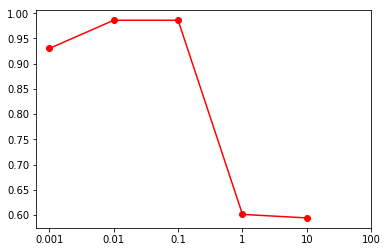

In [48]:
plt.plot(점수, 'ro-')
plt.xticks(range(len(Cs)), Cs)
#plt.xticks(range(6), Cs)